In [148]:
# #This notebook will attempt to train a model to predict the expected medical cost of a patient based on different features. 

# # Medical Cost Prediction Model

# This notebook trains a model to predict medical costs based on various features.

# ## Steps
# 1. Data Preprocessing
# 2. Feature Engineering
# 3. Model Training and Hyperparameter Tuning
# 4. Model Evaluation
# 5. Predictions and Analysis


In [149]:
import pandas as pd 
import numpy as np

df = pd.read_csv("medical_costs.csv")

In [150]:
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,male,15.6,2,yes,northwest,17907.54
1,24,male,29.8,0,yes,northeast,16312.64
2,50,male,29.0,5,no,northwest,6819.21
3,35,male,34.0,1,no,southeast,5247.87
4,31,female,17.6,3,yes,southeast,17525.49


In [151]:
df.describe().T



,count,mean,std,min,25%,50%,75%,max
Age,10000.0,41.678400,13.807724,18.00,30.000,42.00,54.0000,65.00
BMI,10000.0,27.403010,7.228960,15.00,21.100,27.40,33.7000,40.00
Children,10000.0,2.501700,1.701672,0.00,1.000,2.00,4.0000,5.00
Medical Cost,10000.0,11898.932216,6073.875834,3617.09,5909.925,7957.43,17931.9625,20268.21


In [152]:

print(df.isna().sum())
print(df.isnull().sum())

Age             0
Sex             0
BMI             0
Children        0
Smoker          0
Region          0
Medical Cost    0
dtype: int64
Age             0
Sex             0
BMI             0
Children        0
Smoker          0
Region          0
Medical Cost    0
dtype: int64


In [153]:
df.shape , df.size


((10000, 7), 70000)

In [154]:
import plotly.express as px
import seaborn as sns

In [155]:
sex=df.groupby('Sex').aggregate({'Sex':'count'})
sex

,Sex
Sex,
female,5034
male,4966


,Children
Children,
0,1634
1,1683
2,1692
3,1679
4,1647
5,1665


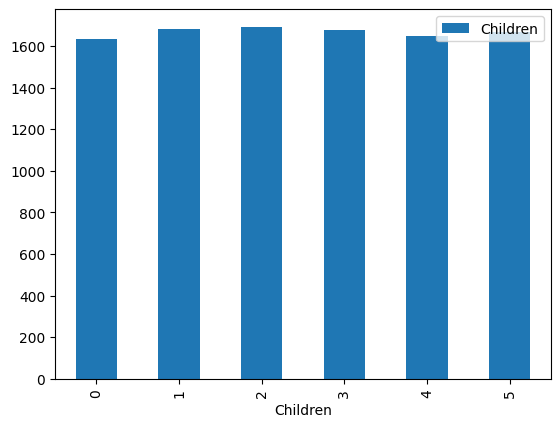

In [156]:
children=df.groupby('Children').aggregate({'Children':'count'})
children.plot(kind='bar')
children

In [157]:

ag = df.groupby('Age').aggregate({'Age': 'count'})
fig = px.bar(ag, title='Age Distribution', labels={'Age': 'Count', 'Age': 'Age'})
fig.show()


In [158]:
# Smoker Count
sm = df.groupby('Smoker').aggregate({'Smoker':'count'})
fig = px.bar(sm,title='Smoking Counts')
fig.show()


In [159]:
rg=df.groupby('Region').aggregate({'Region':'count'})
fig = px.pie(
    rg,
    names=rg.index,
    values='Region',
    title='Region Percentage'
    )
fig.show()

In [160]:

from sklearn.ensemble import RandomForestRegressor # Random Forest Regression Model
from sklearn.model_selection import train_test_split # deviding data into training or testing rasio
from sklearn.preprocessing import LabelEncoder # Converting Categorical Column into numerice



In [161]:
le = LabelEncoder()


In [162]:
# Label Encoding
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [163]:
df.head(10)


,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,1,15.6,2,1,1,17907.54
1,24,1,29.8,0,1,0,16312.64
2,50,1,29.0,5,0,1,6819.21
3,35,1,34.0,1,0,2,5247.87
4,31,0,17.6,3,1,2,17525.49
5,56,0,35.2,5,0,0,7829.12
6,42,1,28.8,5,0,1,6668.57
7,20,1,34.3,0,1,0,16409.13
8,47,0,19.1,2,1,2,18024.82
9,61,1,30.2,1,1,1,18618.26


In [164]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
# df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [165]:
# Selecting Feature or Target Columns
X = df.drop('Medical Cost',axis=1)
y = df['Medical Cost']

# Spliting data into train or test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [166]:
import xgboost as xgb
from xgboost import XGBRegressor


# Create an XGBoost regressor model with GPU support
model = XGBRegressor(tree_method='hist', device='cuda')


In [177]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.5],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.3s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.8s
[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.3s
[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=4, n_es

In [168]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f'Cross-Validation MAE: {scores.mean()}')

Cross-Validation MAE: -254.5591492578125


In [169]:
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)


In [170]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 255.77263634114584
Mean Squared Error: 87840.25774818643
R-squared: 0.9976068143268261


In [171]:
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
predictions_df.to_csv('predictions.csv', index=False)


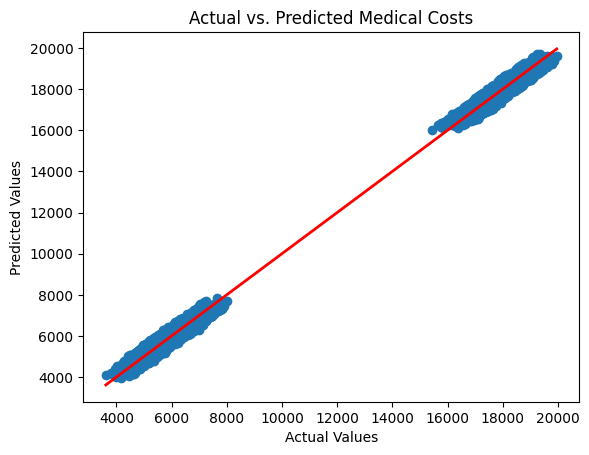

In [172]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Medical Costs')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Line for perfect prediction
plt.show()


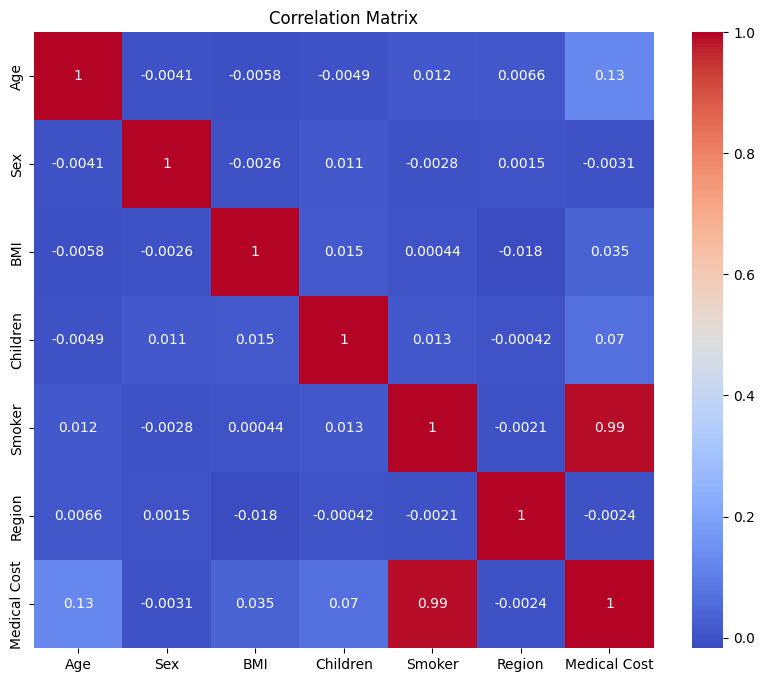

In [176]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [173]:
import plotly.graph_objs as go

# Assuming predictions_df contains the 'Actual' and 'Predicted' columns
# Create traces for scatter plot
trace_actual = go.Scatter(x=list(range(len(predictions_df))), y=predictions_df['Actual'], mode='markers', name='Actual')
trace_pred = go.Scatter(x=list(range(len(predictions_df))), y=predictions_df['Predicted'], mode='markers', name='Predicted')

# Layout settings
layout = go.Layout(title='Actual vs Predicted Values', xaxis=dict(title='Index'), yaxis=dict(title='Value'))

# Combine traces and layout into figure
fig = go.Figure(data=[trace_actual, trace_pred], layout=layout)

# Display the plot
fig.show()


In [174]:
import numpy as np
import joblib

# Load the model 
best_model = joblib.load('medical_cost_model.pkl')

def preprocess_input(input_features):
    """
    Preprocesses the input features to match the training preprocessing steps.
    """
    input_array = np.array(input_features).reshape(1, -1)
    return input_array

def predict_cost(input_features):
    """
    Predicts the medical cost based on input features.
    Args:
    input_features (list): List of input features in the same order as the training data.
    
    Returns:
    float: Predicted medical cost.
    """
    input_array = preprocess_input(input_features)
    
    # Predict using the model
    prediction = best_model.predict(input_array)
    return prediction[0]

# Example predictions with slight changes in input features
examples = [
    [21, 1, 15, 0, 0, 1],
    [22, 1, 16, 0, 0, 1],
    [21, 0, 15, 1, 0, 1],
    [21, 1, 15, 0, 1, 1],
    [21, 1, 15, 0, 0, 2]
]

for example in examples:
    predicted_cost = predict_cost(example)
    print(f'Example: {example}, Predicted Medical Cost: ${predicted_cost:.2f}')


Example: [21, 1, 15, 0, 0, 1], Predicted Medical Cost: $7237.16
Example: [22, 1, 16, 0, 0, 1], Predicted Medical Cost: $7237.16
Example: [21, 0, 15, 1, 0, 1], Predicted Medical Cost: $7744.80
Example: [21, 1, 15, 0, 1, 1], Predicted Medical Cost: $19229.48
Example: [21, 1, 15, 0, 0, 2], Predicted Medical Cost: $7237.16


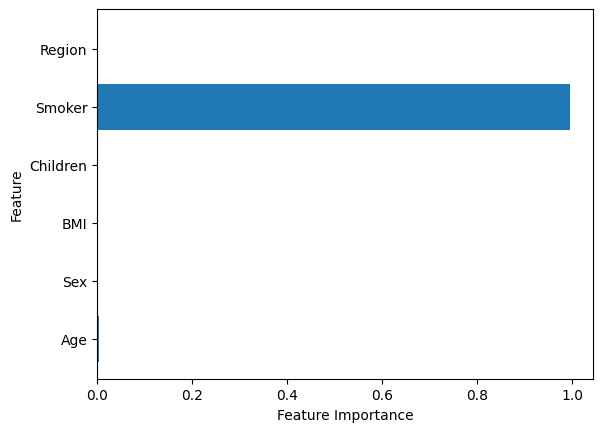

In [175]:
import matplotlib.pyplot as plt

importance = best_model.feature_importances_
plt.barh(X.columns, importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()
